In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
np.random.seed(666)
x = 2 * np.random.random(size=100)

In [14]:
x

array([ 1.40087424,  1.68837329,  1.35302867,  1.45571611,  1.90291591,
        0.02540639,  0.8271754 ,  0.09762559,  0.19985712,  1.01613261,
        0.40049508,  1.48830834,  0.38578401,  1.4016895 ,  0.58645621,
        1.54895891,  0.01021768,  0.22571531,  0.22190734,  0.49533646,
        0.0464726 ,  1.45464231,  0.68006988,  0.39500631,  1.81835919,
        1.95669397,  1.06560509,  0.5182637 ,  1.16762524,  0.65138131,
        1.77779863,  1.25280905,  1.63774738,  1.09469084,  0.83342401,
        1.48609438,  0.73919276,  0.15033309,  1.55038596,  0.43881849,
        0.15868425,  0.97356104,  0.3073478 ,  1.65693027,  0.38273714,
        0.54081791,  1.12206884,  1.80476078,  1.70357668,  0.83616392,
        0.78695254,  0.03244103,  0.59842674,  0.70755644,  1.78700533,
        1.57227314,  1.54277385,  0.84010971,  1.55205028,  0.92861629,
        0.36354033,  1.76805121,  1.43758454,  1.3437626 ,  0.51312727,
        0.86160364,  0.03290715,  0.46998765,  1.02234262,  0.58

In [22]:
y = x*3. + 4. + np.random.normal(size=100)     #偏差

In [26]:
y

array([  8.91412688,   8.89446981,   8.85921604,   9.04490343,
         8.75831915,   4.01914255,   6.84103696,   4.81582242,
         3.68561238,   6.46344854,   4.61756153,   8.45774339,
         3.21438541,   7.98486624,   4.18885101,   8.46060979,
         4.29706975,   4.06803046,   3.58490782,   7.0558176 ,
         4.04787249,   7.46699513,   7.17356576,   6.90706602,
        10.06445574,  10.46043335,   6.56186893,   7.41768066,
         6.63306338,   5.16962652,   8.92568927,   8.81142811,
         8.27497363,   9.55931293,   8.31763691,   8.39594229,
         6.46897919,   4.53407649,   9.01364797,   5.23131871,
         5.35968048,   4.92858955,   4.86197655,   8.18778792,
         3.53458796,   3.82545342,   7.06040408,  10.08420404,
        10.5135845 ,   5.57993775,   6.63546582,   2.56719372,
         6.94786703,   5.21927087,   9.54664436,   8.92205488,
         9.1083202 ,   7.66433039,   8.04596666,   7.0692907 ,
         6.52268065,   8.89229807,  11.53002966,   6.91

In [16]:
X = x.reshape(-1,1)

In [44]:
X.shape

(100, 1)

In [45]:
y.shape

(100,)

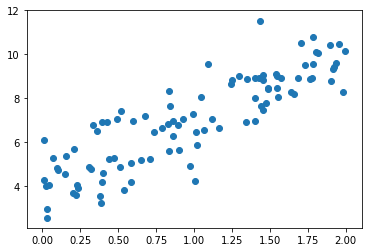

In [32]:
plt.scatter(x,y)
plt.show()

# 使用梯度的下降法进行训练

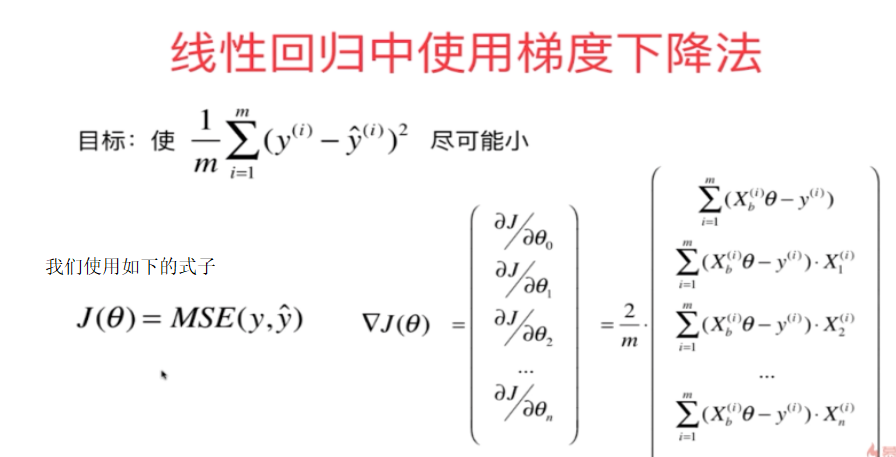

In [18]:
def J(theta,X_b,y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')

In [19]:
def dJ(theta,X_b,y):
    res =np.empty(len(theta))    #开辟空间存储我们的导数
    res[0] = np.sum(X_b.dot(theta)-y)     #此处是向量
    for i in range(1,len(theta)):
        res[i] = (X_b.dot(theta)-y).dot(X_b[:,i])     #此处是矩阵  向量的点乘
    return res*2/len(X_b)

In [20]:
def gradient_descent(X_b,y,initial_theta,eta,n_iters=1e4,epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradien = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta - eta * gradien
        
        if (abs(J(theta,X_b,y) - J(last_theta,X_b,y))<epsilon):
            break
        i_iter+=1
    return theta

In [26]:
X_b = np.hstack([np.ones([len(X),1]),X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b,y,initial_theta,eta)

2

In [55]:
theta

array([ 4.02145786,  3.00706277])

# 使用我们自己封装的方法

In [79]:
%run D:/Python1/Muke_MLB/LinearRegression.py

In [80]:
lin_reg = LinearRegression()

In [81]:
lin_reg.fit_gd(X,y,eta=0.01,n_iters=1e4)

LinearRegression

In [82]:
lin_reg.coef_

array([ 3.00706277])

In [83]:
lin_reg.intercept_

4.021457858204859